# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [90]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [91]:
bins = [-float('inf'), -10.5, float('inf')]
labels = ['Latitude < -10.5',  'Latitude > -10.5']

In [92]:
municipio_lat = pd.cut(sinasc_raw['munResLat'], bins=bins, labels=labels)

In [93]:
sinasc_raw.pivot_table(['IDADEMAE', 'PESO'], municipio_lat, aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std'])

sum                 mean                   min       \
                 IDADEMAE      PESO   IDADEMAE         PESO IDADEMAE PESO   
munResLat                                                                   
Latitude < -10.5   340143  42098594  26.178943  3240.098053       12  258   
Latitude > -10.5   365094  45555148  26.014964  3246.055864       11  295   

                      max         median               std              
                 IDADEMAE  PESO IDADEMAE    PESO  IDADEMAE        PESO  
munResLat                                                               
Latitude < -10.5       53  5985     26.0  3270.0  6.320385  531.815114  
Latitude > -10.5       52  5190     25.0  3275.0  6.447663  556.487709

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [94]:
bins = [-float('inf'), 3000, float('inf')]
labels = ['Área do município < 3000',  'Área do município > 3000']

In [95]:
municipio_area = pd.cut(sinasc_raw['munResArea'], bins=bins, labels=labels)

In [96]:
sinasc_raw.pivot_table(['IDADEMAE', 'PESO'], municipio_area, aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std'])

sum                 mean                   min  \
                         IDADEMAE      PESO   IDADEMAE         PESO IDADEMAE   
munResArea                                                                     
Área do município < 3000   137389  16796616  26.324775  3218.359073       11   
Área do município > 3000   567848  70857126  26.038518  3249.134538       12   

                                   max         median               std  \
                         PESO IDADEMAE  PESO IDADEMAE    PESO  IDADEMAE   
munResArea                                                                
Área do município < 3000  258       53  5720     26.0  3245.0  6.305535   
Área do município > 3000  292       53  5985     25.0  3280.0  6.405497   

                                      
                                PESO  
munResArea                            
Área do município < 3000  531.583103  
Área do município > 3000  547.716582

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [97]:
bins = [85.0, 350, 595.0]
labels = ['Área do município < 350',  'Área do município > 350']
municipio_alt = pd.cut(sinasc_raw['munResAlt'], bins=bins, labels=labels)
sinasc_raw.pivot_table(['IDADEMAE', 'PESO'], municipio_alt, aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std'])

sum                 mean                   min  \
                        IDADEMAE      PESO   IDADEMAE         PESO IDADEMAE   
munResAlt                                                                     
Área do município < 350   644967  80212910  26.078239  3243.284409       11   
Área do município > 350    51763   6329977  26.436670  3232.878958       14   

                                  max         median               std  \
                        PESO IDADEMAE  PESO IDADEMAE    PESO  IDADEMAE   
munResAlt                                                                
Área do município < 350  285       53  5985     26.0  3270.0  6.390459   
Área do município > 350  258       47  4920     26.0  3275.0  6.342291   

                                     
                               PESO  
munResAlt                            
Área do município < 350  543.762480  
Área do município > 350  555.812177

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [98]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [99]:
df = sinasc_raw#[['DTNASC', 'IDADEMAE', 'munResNome', 'APGAR5', 'PESO']]

In [100]:
intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",

    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",

    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",

    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",

    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",

    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [101]:
def regiao(valore):
    if valore in intermediarias:
        nome = intermediarias[valore]
        nome = str(nome)
        return nome

regiao('Theobroma')

'Jaru'

In [102]:
df['Região'] = df['munResNome'].apply(regiao)

In [103]:
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Região
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Cacoal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal


In [104]:
# Regiões
regioes_lista = df['Região'].unique().tolist()
regioes_lista

['Cacoal', 'Ariquemes', 'Jaru', 'Porto Velho', 'Ji-Paraná', 'Vilhena', None]

In [105]:
df.groupby('Região')['IDADEMAE'].describe().transpose()

Região,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
count,3233.000000,4603.000000,1683.000000,4962.000000,10096.000000,2450.000000
mean,25.459635,26.347817,25.708853,26.094720,26.166303,26.417143
std,6.137376,6.277692,6.249344,6.290577,6.577656,6.343047
min,11.000000,13.000000,12.000000,12.000000,12.000000,13.000000
25%,21.000000,21.000000,21.000000,21.000000,21.000000,22.000000
50%,25.000000,26.000000,25.000000,26.000000,26.000000,26.000000
75%,30.000000,31.000000,30.000000,31.000000,31.000000,31.000000
max,44.000000,53.000000,45.000000,52.000000,47.000000,53.000000


<Axes: xlabel='DTNASC'>

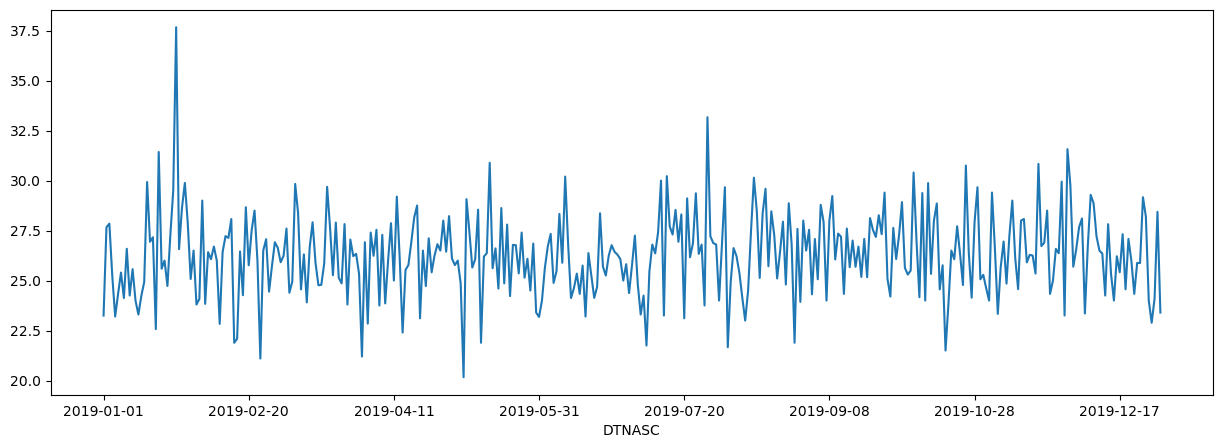

In [106]:
df[df['Região'] == 'Cacoal'].groupby('DTNASC')['IDADEMAE'].mean().plot(figsize=[15,5])

<Axes: xlabel='DTNASC'>

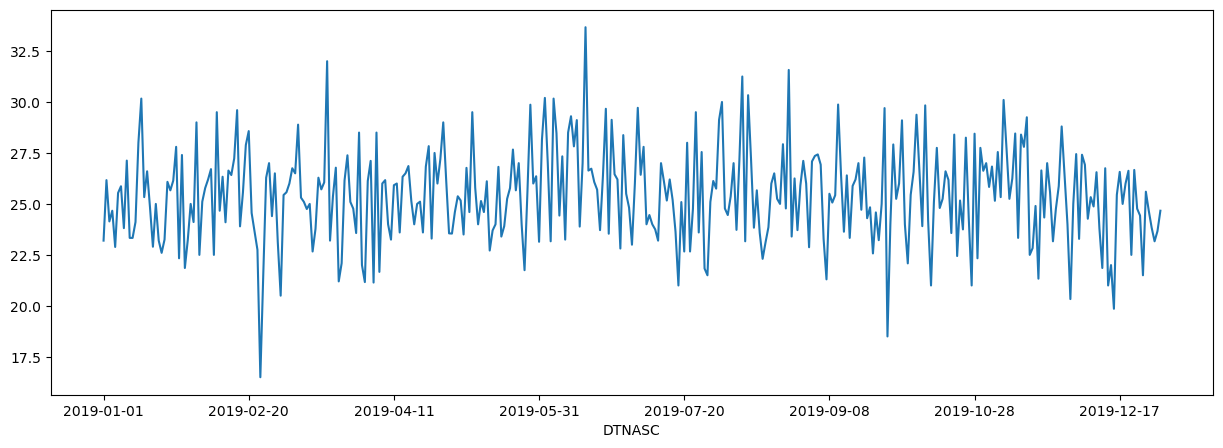

In [107]:
df[df['Região'] == 'Ariquemes'].groupby('DTNASC')['IDADEMAE'].mean().plot(figsize=[15,5])

<Axes: xlabel='DTNASC'>

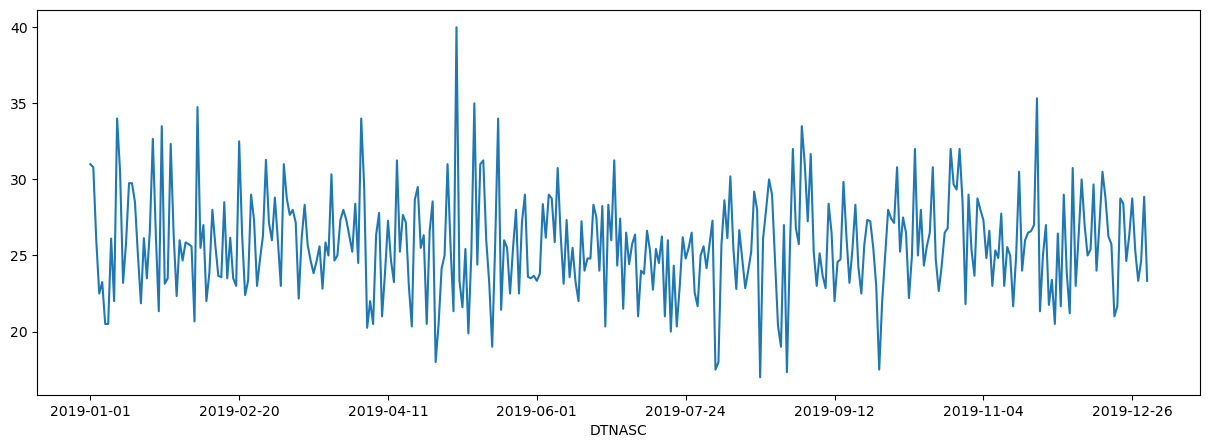

In [108]:
df[df['Região'] == 'Jaru'].groupby('DTNASC')['IDADEMAE'].mean().plot(figsize=[15,5])

<Axes: xlabel='DTNASC'>

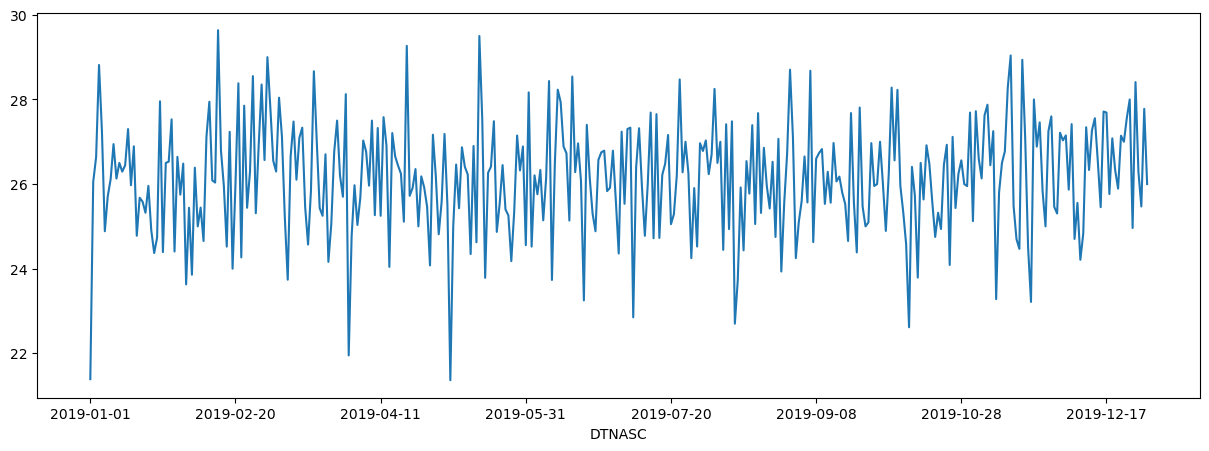

In [109]:
df[df['Região'] == 'Porto Velho'].groupby('DTNASC')['IDADEMAE'].mean().plot(figsize=[15,5])

<Axes: xlabel='DTNASC'>

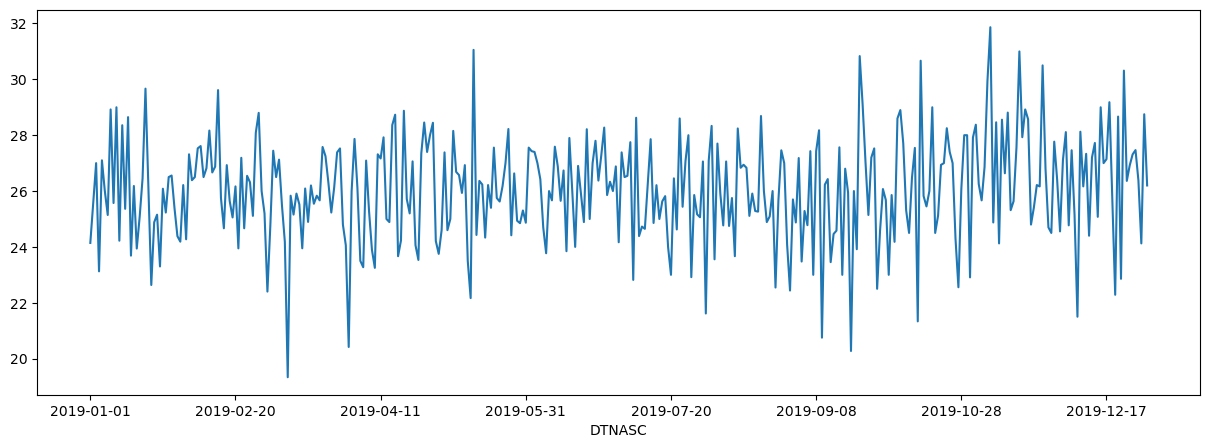

In [110]:
df[df['Região'] == 'Ji-Paraná'].groupby('DTNASC')['IDADEMAE'].mean().plot(figsize=[15,5])

<Axes: xlabel='DTNASC'>

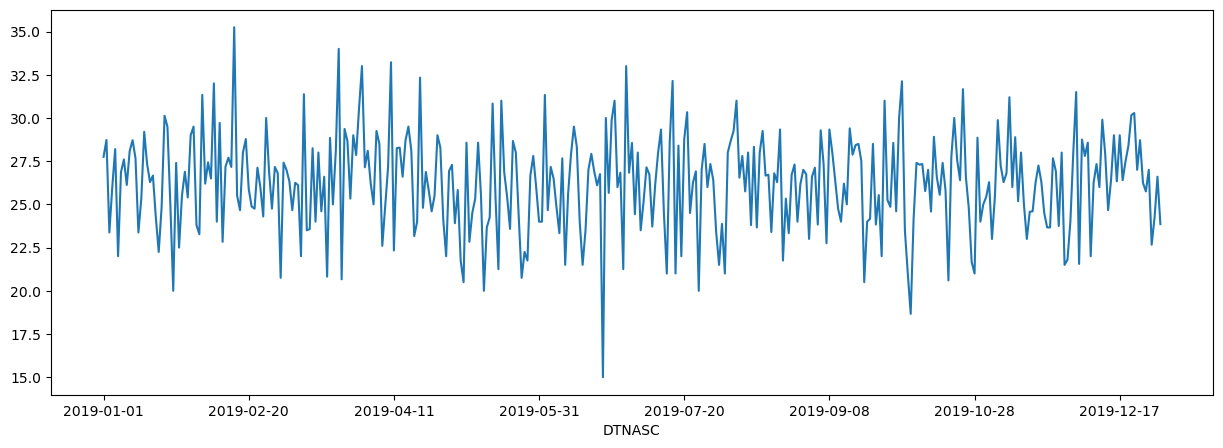

In [111]:
df[df['Região'] == 'Vilhena'].groupby('DTNASC')['IDADEMAE'].mean().plot(figsize=[15,5])

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [112]:
idh_df = pd.read_csv('idh.csv')
idh_df = idh_df.drop('Unnamed: 0', axis=1)
idh_df.head()

,Posição,Cidade,IDH Municipal,IDH Renda,IDH Longevidade,IDH Educação,Status,Região
0,1,Porto Velho,0.736,0.764,0.819,0.638,IDH-M alto,Porto Velho
1,2,Vilhena,0.731,0.734,0.808,0.659,IDH-M alto,Vilhena
2,3,Cacoal,0.718,0.727,0.821,0.620,IDH-M alto,Cacoal
3,4,Ji-Paraná,0.714,0.728,0.810,0.617,IDH-M alto,Ji-Paraná
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613,IDH-M alto,Cacoal


In [113]:
l = idh_df[idh_df['Status'] == 'IDH-M alto']
idh_df['IDH Educação'].mean()

0.5160192307692308

In [114]:
idh_df.to_csv('IDH.csv')

In [115]:
def mt():
    pass

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [116]:
ifdm_df = pd.read_csv('ifdm.csv')
ifdm_df = ifdm_df.drop('Unnamed: 0', axis=1)
ifdm_df.head()

,Posição,Cidade,Valor,Região
0,1º,Ariquemes,0.7746,Ariquemes
1,2º,Vilhena,0.7465,Vilhena
2,3º,Pimenta Bueno,0.7383,Cacoal
3,4º,Porto Velho,0.7257,Porto Velho
4,5º,Ji-Paraná,0.7117,Ji-Paraná


In [117]:
ifdm_df.to_csv('IFDM.csv')

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [118]:
pib_df = pd.read_csv('pib.csv')
pib_df = pib_df.drop('Unnamed: 0', axis=1)
pib_df.head()

,Posição,Cidade,Valor do PIB,Região,Status
0,0,Porto Velho,17912070,Porto Velho,Até 100 Milhões
1,1,Ji-Paraná,3783972,Ji-Paraná,Acima de 1 Bilhão
2,2,Vilhena,2831175,Vilhena,Acima de 1 Bilhão
3,3,Ariquemes,2579830,Ariquemes,Acima de 1 Bilhão
4,4,Cacoal,2261644,Cacoal,Acima de 1 Bilhão


In [119]:
pib_df.to_csv('Pib.csv')

In [120]:
pib_df['Região'].value_counts()

Região
Ji-Paraná      11
Cacoal          9
Ariquemes       8
Vilhena         7
Porto Velho     5
Jaru            4
Name: count, dtype: int64

In [121]:
gb = pib_df.groupby('Região')[' Valor do PIB'].mean()
gb

Região
Ariquemes      5.837865e+05
Cacoal         6.023159e+05
Jaru           4.736815e+05
Ji-Paraná      6.183101e+05
Porto Velho    4.002284e+06
Vilhena        6.059301e+05
Name:  Valor do PIB, dtype: float64